## Practical Machine Learning-Prediction Assignment Submission


### Rajesh Singh
October 12th 2017

## Background

Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, your goal will be to use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants. They were asked to perform barbell lifts correctly and incorrectly in 5 different ways. More information is available from the website here: http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har (see the section on the Weight Lifting Exercise Dataset).

## Data

The training data for this project are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv

The test data are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv

The data for this project come from this source: http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har. If you use the document you create for this class for any purpose please cite them as they have been very generous in allowing their data to be used for this kind of assignment.

## Goal 

The goal of your project is to predict the manner in which they did the exercise. This is the "classe" variable in the training set. You may use any of the other variables to predict with. You should create a report describing how you built your model, how you used cross validation, what you think the expected out of sample error is, and why you made the choices you did. You will also use your prediction model to predict 20 different test cases.

In [1]:
### Training data set can be found on the following URL:

trainURL <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv"

In [2]:
### Testing data set can be found on the following URL:

testURL <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv"

### Loading the data


In [3]:
training <- read.csv(url(trainURL))
testing <- read.csv(url(testURL))

### Glance of DataSet

In [4]:
str(training, list.len= 15)


'data.frame':	19622 obs. of  160 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_name               : Factor w/ 6 levels "adelmo","carlitos",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ raw_timestamp_part_1    : int  1323084231 1323084231 1323084231 1323084232 1323084232 1323084232 1323084232 1323084232 1323084232 1323084232 ...
 $ raw_timestamp_part_2    : int  788290 808298 820366 120339 196328 304277 368296 440390 484323 484434 ...
 $ cvtd_timestamp          : Factor w/ 20 levels "02/12/2011 13:32",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ new_window              : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ num_window              : int  11 11 11 12 12 12 12 12 12 12 ...
 $ roll_belt               : num  1.41 1.41 1.42 1.48 1.48 1.45 1.42 1.42 1.43 1.45 ...
 $ pitch_belt              : num  8.07 8.07 8.07 8.05 8.07 8.06 8.09 8.13 8.16 8.17 ...
 $ yaw_belt                : num  -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 ...
 $ total_accel_belt    

In [5]:
table(training$classe)



   A    B    C    D    E 
5580 3797 3422 3216 3607 

In [6]:
prop.table(table(training$user_name, training$classe), 1)


          
                   A         B         C         D         E
  adelmo   0.2993320 0.1993834 0.1927030 0.1323227 0.1762590
  carlitos 0.2679949 0.2217224 0.1584190 0.1561697 0.1956941
  charles  0.2542421 0.2106900 0.1524321 0.1815611 0.2010747
  eurico   0.2817590 0.1928339 0.1592834 0.1895765 0.1765472
  jeremy   0.3459730 0.1437390 0.1916520 0.1534392 0.1651969
  pedro    0.2452107 0.1934866 0.1911877 0.1796935 0.1904215

In [7]:
prop.table(table(training$classe))



        A         B         C         D         E 
0.2843747 0.1935073 0.1743961 0.1638977 0.1838243 

### Splitting training sets into test and validation sets

We will divide 70% of set for training purposes(actual model building), while 30% remainder will be used only for testing

In [8]:
library(caret)


Loading required package: lattice
Loading required package: ggplot2


In [9]:
set.seed(12345)
inTrain <- createDataPartition(y=training$classe, p= 0.70, list=FALSE)
train1 <- training[inTrain,]
test1 <- training[-inTrain,]
dim(train1)

[1] 13737   160

In [10]:
dim(test1)

[1] 5885  160

-->The training data set (train1) contains 13737 observations or about 70% of entire training data set. 
-->The training data set (train2) contains 5885 or about 30% of the entire training data set. 
-->Both created datasets have 160 variables. Those variables have plenty of NA, that can be removed with cleaning procedures below. 

### Cleaning the data

Remove variables with Nearly Zero Variance & mostly NA



In [11]:
NZV <- nearZeroVar(train1)
train1 <- train1[, -NZV]
test1  <- test1[, -NZV]
dim(train1)

[1] 13737   106

In [12]:
dim(test1)

[1] 5885  106

In [13]:
AllNA    <- sapply(train1, function(x) mean(is.na(x))) > 0.95
train1 <- train1[, AllNA==FALSE]
test1  <- test1[, AllNA==FALSE]
dim(train1)

[1] 13737    59

In [14]:
dim(test1)


[1] 5885   59

### Remove identification only variables (column 1 to 5)


In [15]:
train1 <- train1[, -(1:5)]
test1  <- test1[, -(1:5)]
dim(train1)

[1] 13737    54

In [16]:
dim(test1)


[1] 5885   54

Please note - By cleaning the data above, the number of variables has been reduced to 54

In [17]:
library(corrplot)


Warning message:
"package 'corrplot' was built under R version 3.4.2"

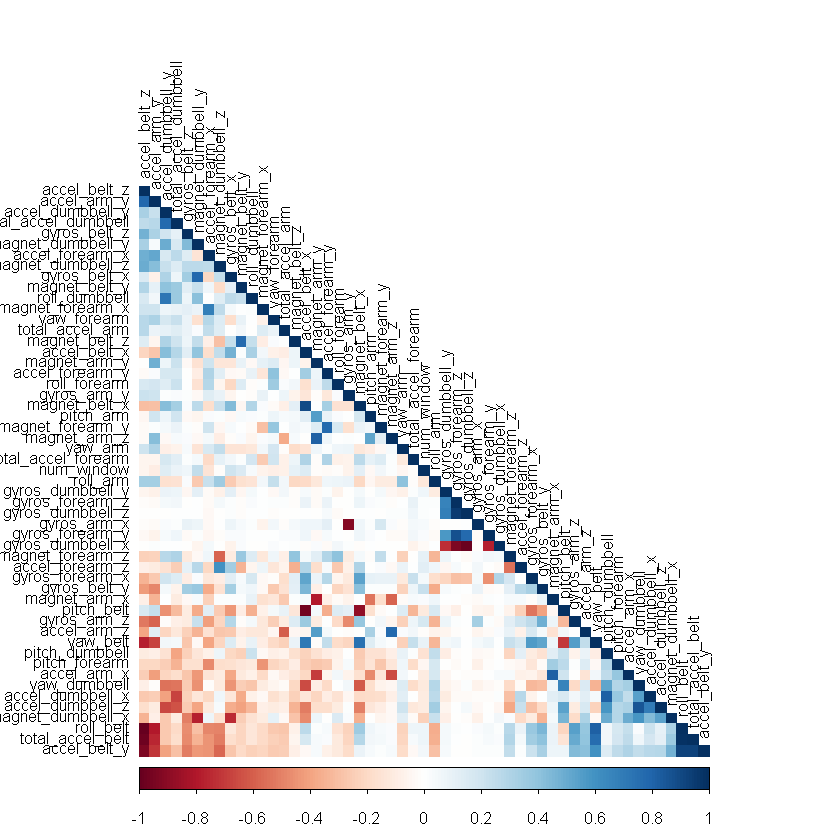

In [18]:
corMatrix <- cor(train1[, -54])
corrplot(corMatrix, order = "FPC", method = "color", type = "lower", tl.cex = 0.8, tl.col = rgb(0, 0, 0))

## Data Analysis

### Prediction with Decision Tree


In [19]:
library(rpart)


In [20]:
library(rpart.plot)


Warning message:
"package 'rpart.plot' was built under R version 3.4.2"

In [21]:
library(RColorBrewer)


In [22]:
library(rattle)

Warning message:
"package 'rattle' was built under R version 3.4.2"Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [23]:
library(knitr)


In [24]:
set.seed(12345)

modFit1 <- rpart(classe ~ ., data= train1, method = "class")

prediction1 <- predict(modFit1, test1, type= "class")
cmtree <- confusionMatrix(prediction1, test1$classe)
cmtree

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1530  269   51   79   16
         B   35  575   31   25   68
         C   17   73  743   68   84
         D   39  146  130  702  128
         E   53   76   71   90  786

Overall Statistics
                                         
               Accuracy : 0.7368         
                 95% CI : (0.7253, 0.748)
    No Information Rate : 0.2845         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6656         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9140  0.50483   0.7242   0.7282   0.7264
Specificity            0.9014  0.96650   0.9502   0.9100   0.9396
Pos Pred Value         0.7866  0.78338   0.7543   0.6131   0.7305
Neg Pred Value         0.9635  0.89051   0.9422   0.9447   0.9384
Prevalence            

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

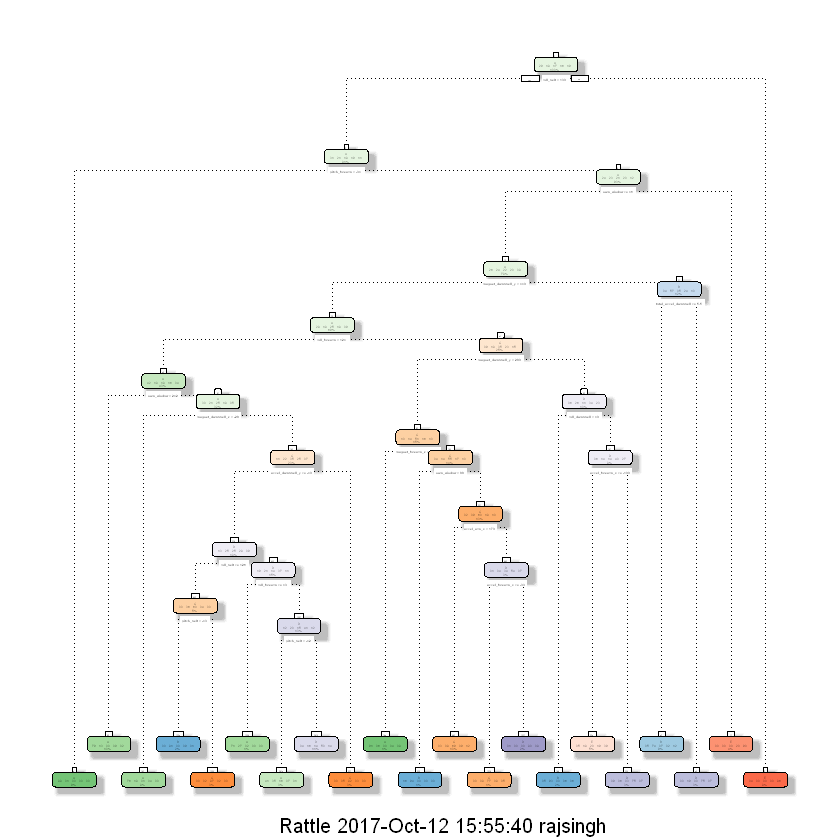

In [25]:
## Fit the model after preprocessing
modFit2 <- train(classe ~ ., data= train1, method = "rpart", preProcess = c("center", "scale"))

fancyRpartPlot(modFit1)

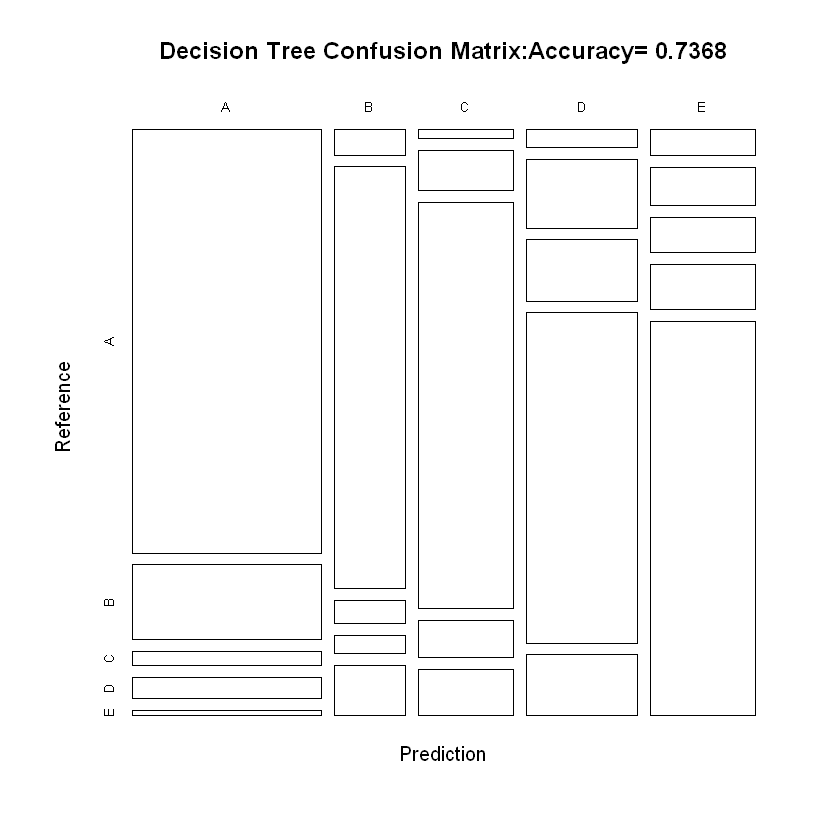

In [26]:
plot(cmtree$table, col= cmtree$byClass, main= paste("Decision Tree Confusion Matrix:Accuracy=", round(cmtree$overall['Accuracy'],4)))

Decision tree has a prediction accuracy of 0.7368.

The accuracy of the decision tree models is not good at all. The accuracy is 73%. Preprocessing the data did not help the performance of the regression tree based on predictions. Random Forest can help us now here


## Prediction with Random Forest

We fit a predictive model for activity recognition using Random Forest algorithm because it automatically selects important variables and is robust to correlated covariates & outliers in general.

In [27]:
library(randomForest)


randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin



The default number of trees( 100) gives a reasonable tradeoff training time and accuracy time.

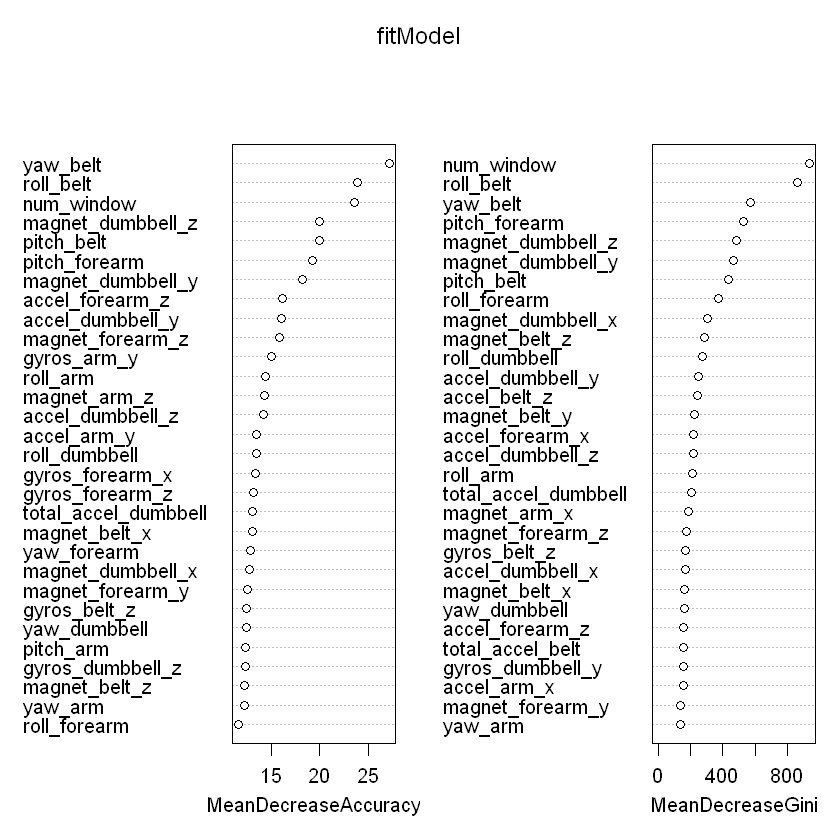

In [28]:
set.seed(12345)
fitModel <- randomForest(classe ~ ., data= train1,importance= TRUE, ntree= 100)
varImpPlot(fitModel)

Since the Random Forests yielded better Results with 0.9962, we will apply the random forest model to the test

## Applying the Model to the Test Dataset

### Prediction on Test dataset


In [29]:
predictions <- predict(fitModel, test1, type= "class")

confusions <- confusionMatrix(predictions, test1$classe )
confusions

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1674    6    0    0    0
         B    0 1132    8    0    0
         C    0    1 1018   14    0
         D    0    0    0  950    2
         E    0    0    0    0 1080

Overall Statistics
                                          
               Accuracy : 0.9947          
                 95% CI : (0.9925, 0.9964)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9933          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   0.9939   0.9922   0.9855   0.9982
Specificity            0.9986   0.9983   0.9969   0.9996   1.0000
Pos Pred Value         0.9964   0.9930   0.9855   0.9979   1.0000
Neg Pred Value         1.0000   0.9985   0.9984   0.9972   0.9996
Prevalence    

### Using the Random Forest model to apply to predict the 20 quiz results (testing datasets) as shown below

In [30]:
predictRandForest <- predict(fitModel, newdata=testing)
predictRandForest

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 B  A  B  A  A  E  D  B  A  A  B  C  B  A  E  E  A  B  B  B 
Levels: A B C D E

### Plot of random Forest


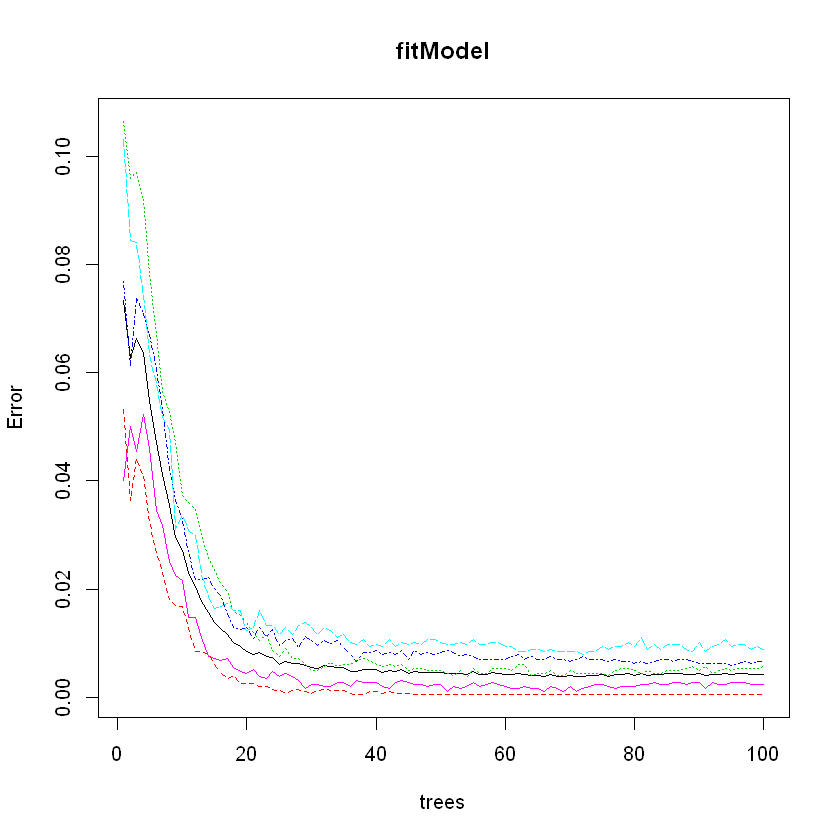

In [31]:
plot(fitModel)


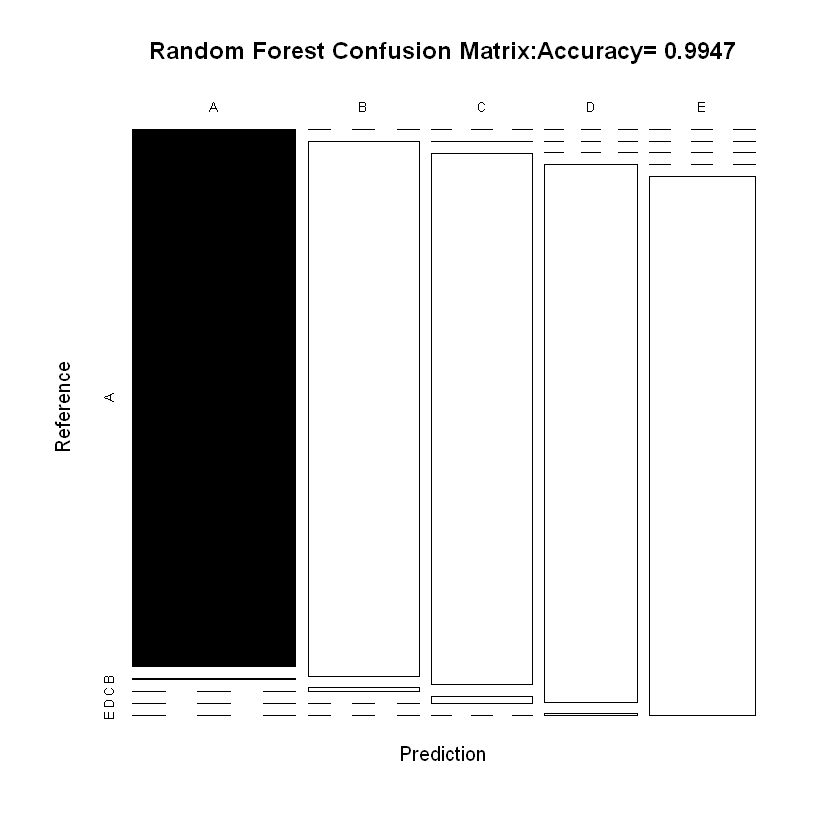

In [32]:
plot(confusions$table, col = confusions$byClass, main= paste("Random Forest Confusion Matrix:Accuracy=", round(confusions$overall['Accuracy'], 4)))


## Prediction with Generalized Boosted Regression

In [33]:
set.seed(12345)
fitControl <- trainControl(method = "repeatedcv",
                           number = 5,
                           repeats = 1)

gbmFit <- train(classe~ ., data= train1, method = "gbm", trControl = fitControl, verbose= FALSE)

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.4.2"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3
Loading required package: plyr


In [34]:
gbmFinMod1 <- gbmFit$finalModel

gbmPredTest <- predict(gbmFit, newdata= test1)

gbmAccuracyTest <- confusionMatrix(gbmPredTest, test1$classe)
gbmAccuracyTest

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1670    9    0    3    0
         B    2 1117   20    2    1
         C    0   11 1004   14    3
         D    1    2    2  944   11
         E    1    0    0    1 1067

Overall Statistics
                                          
               Accuracy : 0.9859          
                 95% CI : (0.9825, 0.9888)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9822          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9976   0.9807   0.9786   0.9793   0.9861
Specificity            0.9972   0.9947   0.9942   0.9967   0.9996
Pos Pred Value         0.9929   0.9781   0.9729   0.9833   0.9981
Neg Pred Value         0.9990   0.9954   0.9955   0.9959   0.9969
Prevalence    

### Generalized Boosted Regression has prediction of 0.987


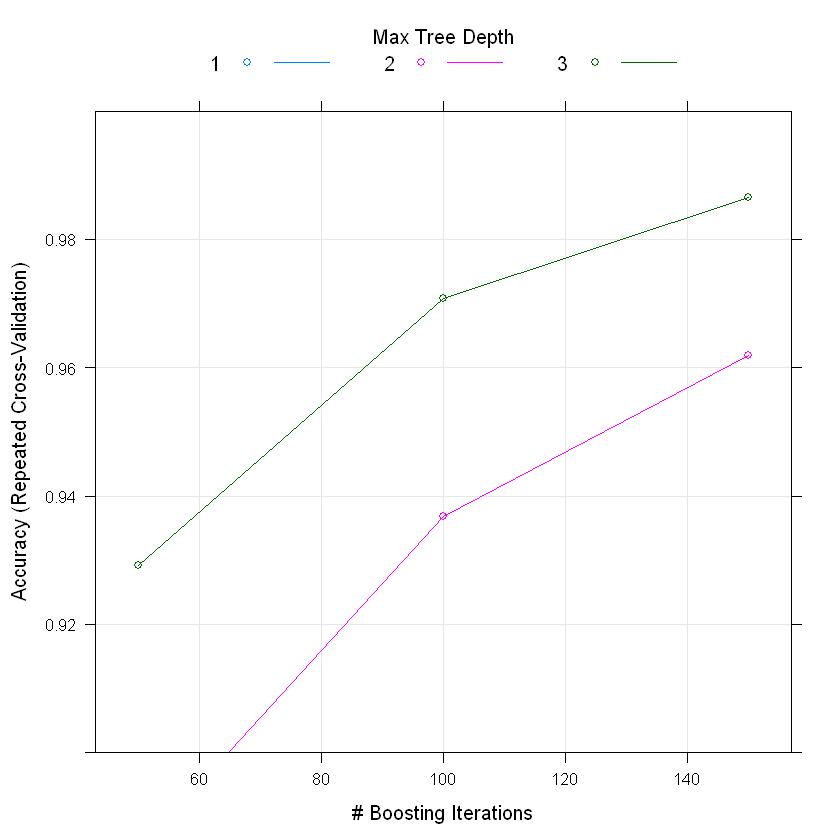

In [36]:
plot(gbmFit, ylim= c(0.9, 1))


### Prediction with Linear Discriminant Analysis

We will test the Linear Discriminant Analysis in accurately predicting the testing data. This assumes that the data follow a probablistic model.

In [37]:
set.seed(2127)

modFitLDA <- train(classe ~., data= train1, method = "lda")

Loading required package: MASS


In [38]:
predictLDA <- predict(modFitLDA, newdata= test1)

confusionMatrix(predictLDA, test1$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1404  168   92   52   44
         B   39  728   99   47  166
         C  110  146  655  133   89
         D  112   45  144  694  103
         E    9   52   36   38  680

Overall Statistics
                                          
               Accuracy : 0.7071          
                 95% CI : (0.6952, 0.7187)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6291          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.8387   0.6392   0.6384   0.7199   0.6285
Specificity            0.9155   0.9260   0.9016   0.9179   0.9719
Pos Pred Value         0.7977   0.6747   0.5781   0.6321   0.8344
Neg Pred Value         0.9345   0.9145   0.9219   0.9436   0.9207
Prevalence    

### Predicting Results on the Test Data

#### The accuracy of the 4 regression modelling methods above are:
1. Random Forest: 0.9947
2. Decision Tree: 0.7368
3. GBM: 0.9839
4. LDA: 0.7071
Random Forests gave the best accuracy in my Testing dataset of 99.62% out of the four prediction models. THis is more accurate than Decision Tree of 79.58%, Generalized Boosted Regression of 98.7%, and the Linear Discriminant Analysis LDA of 70.71%.

Thanks - Rajesh Singh